In [40]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/temp/df_dis2,3.csv', encoding='ANSI', index_col=0)
df

,비아파트가구수,아파트평균시가,점포수,연령대30직장인구수,관공서수,은행수,약국수,백화점수,극장수,숙박시설수,의료기관,교육기관,대중교통,연령대20유동인구수,월매출평균,survive
상권코드,,,,,,,,,,,,,,,,
1000001,773.850000,2.190338e+08,0.00,231.500000,0.0,0.000000,0.0,0.0,12.700000,21.200000,0.0,0.0,7.6,31522.75,6.377865e+07,62.962963
1000002,788.750000,8.706928e+07,0.00,81.000000,0.0,1.000000,0.0,0.0,1.000000,3.000000,0.0,0.0,1.0,60064.00,4.564560e+07,100.000000
1000003,661.100000,1.139950e+08,1.10,460.250000,0.0,0.400000,0.0,0.0,1.800000,9.600000,0.0,3.2,4.3,25811.80,2.371337e+07,61.538462
1000004,782.750000,8.857558e+07,1.35,8.150000,0.0,0.000000,3.0,0.0,0.000000,0.400000,0.0,0.0,8.0,158987.60,9.412677e+07,42.583732
1000005,725.714286,1.927482e+08,0.00,163.714286,0.0,0.285714,0.0,0.0,0.714286,1.142857,0.0,0.0,3.0,10600.00,6.265570e+07,68.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001489,129.150000,1.805066e+08,1.00,40.050000,0.0,1.400000,4.6,0.0,0.000000,0.800000,0.0,0.0,3.5,24008.85,2.988283e+07,56.834532
1001491,3661.750000,3.527378e+08,4.40,1791.450000,3.6,7.800000,3.0,0.0,10.800000,15.600000,0.0,0.0,22.1,694293.00,1.331331e+07,82.608696
1001493,1071.350000,2.198021e+08,8.70,3558.500000,2.9,13.600000,12.4,0.0,13.200000,14.000000,2.2,4.4,22.0,614806.55,5.334804e+06,69.696970


In [41]:
X=df.iloc[:,:-1] #독립변수
y=df['survive'] #종속변수

In [42]:
from sklearn.model_selection import train_test_split 
#학습용:검증용 8:2로 구분
X_train, X_test, y_train, y_test=train_test_split(X, y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

864 289 864 289


In [43]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled=pd.DataFrame(X_test_scaled)

In [44]:
result_tr=[] #모델별 학습용 정확도 저장 리스트
result_te=[] #모델별 학습용 정확도 저장 리스트
result_rm=[] #모델별 평균제곱오차 저장 리스트

In [45]:
################ Linear Regression ################
from sklearn.linear_model import LinearRegression 
lin=LinearRegression()
lin.fit(X_train_scaled, y_train) #표준화된 데이터로 학습
score_tr=lin.score(X_train_scaled, y_train)
score_te=lin.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.0754073551432668
검증용 정확도 : 0.1002670618640199


In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np
predictions = lin.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 18.918843856698377


In [47]:
################ Decision Tree ################
from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
print('학습용 정확도 :', tree.score(X_train_scaled, y_train))
print('검증용 정확도 :', tree.score(X_test_scaled, y_test))

학습용 정확도 : 1.0
검증용 정확도 : -0.8680262117824518


In [48]:
# max_depth 3으로 가지치기 단계
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_scaled, y_train)
score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.16514475840891274
검증용 정확도 : 0.03406717801839598


In [49]:
predictions = tree.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 19.602490167729044


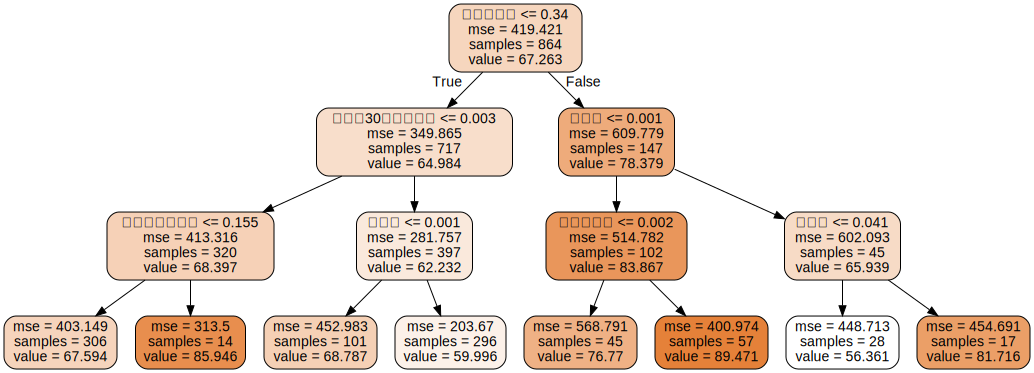

In [50]:
from sklearn.tree import export_graphviz 
export_graphviz(
    tree, 
    out_file='c:/data/project/dicisionTree.dot',
    feature_names = X_train_scaled.columns,
    class_names=['0','1'],
    rounded=True,
    filled=True
)

import graphviz
with open('c:/data/project/dicisionTree.dot', encoding="utf-8") as f:
    dot_graph = f.read() 
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='dicisionTree', directory='c:/data/project')
dot

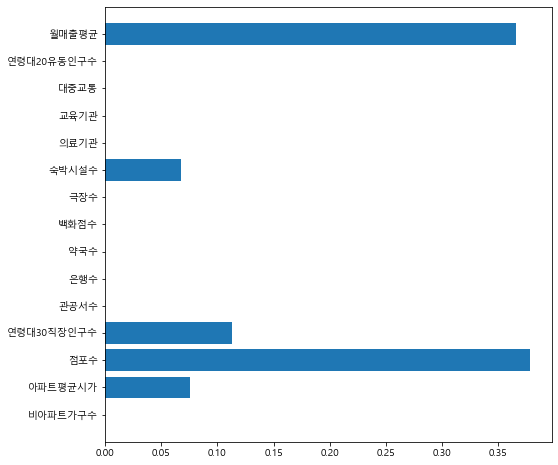

In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#특성 중요도 그래프
def plot_tree(model):
    n_features=X.shape[1] #독립변수의 개수
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.ylim(-1, n_features)

plot_tree(tree) 

In [52]:
################ RandomForest ################
from sklearn.ensemble import RandomForestRegressor
# n_estimators 트리의 개수 
forest=RandomForestRegressor(n_estimators=80)
forest.fit(X_train_scaled, y_train)
score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.8697104625137173
검증용 정확도 : 0.012425181529628682


In [53]:
predictions = forest.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 19.820873361672103


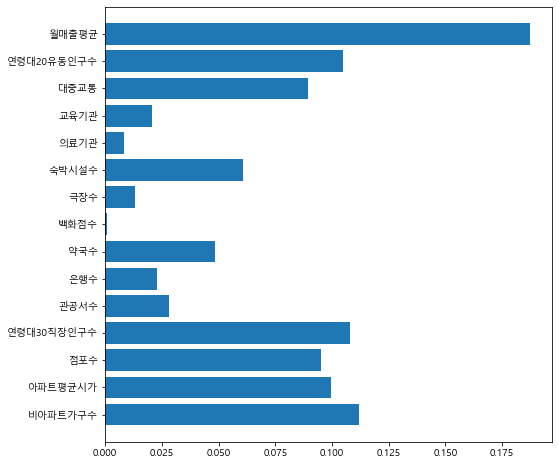

In [54]:
plot_tree(forest) #특성 중요도 그래프
# research > teaching > citations

이웃 수 1 일때 :  -0.8140851148898707
이웃 수 2 일때 :  -0.25719128447310124
이웃 수 3 일때 :  -0.1507502205677227
이웃 수 4 일때 :  -0.1018326955560318
이웃 수 5 일때 :  -0.04562720605965831
이웃 수 6 일때 :  -0.062204585927599254
이웃 수 7 일때 :  -0.008309359318597442
이웃 수 8 일때 :  0.015666854710577494
이웃 수 9 일때 :  0.04240164417505399
이웃 수 10 일때 :  0.03378853876248278
최적의 k: 9
최적의 정확도: 0.04240164417505399


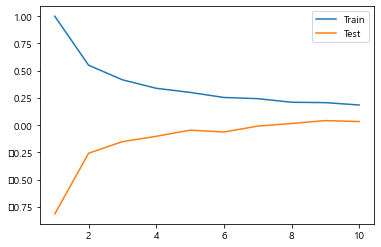

In [55]:
################ K-Means ################
from sklearn.neighbors import KNeighborsRegressor
import numpy as np 
train_rate=[]
test_rate=[]
neighbors=range(1,11) # 이웃의 수 1~10
for n in neighbors:
    knr=KNeighborsRegressor(n_neighbors=n) #이웃의 수
    knr.fit(X_train_scaled, y_train)
    train_rate.append(knr.score(X_train_scaled, y_train))
    test_rate.append(knr.score(X_test_scaled, y_test))

for i in range(0, len(test_rate)) :
    print('이웃 수', i+1, '일때 : ', test_rate[i])
test_arr=np.array(test_rate) #넘파이배열로 바꾸고
idx=np.argmax(test_arr)
# print(test_arr[idx]) #최대값의 인덱스
# max_rate=np.max(test_arr) #최대값
# print(test_arr[max_rate])
# np.where() #조건에 맞는 데이터의 인덱스 검색 
# idx=np.where(test_arr == max_rate)[0][0] 
print('최적의 k:',neighbors[idx])
print('최적의 정확도:',test_rate[idx]) 
plt.plot(neighbors, train_rate, label='Train')
plt.plot(neighbors, test_rate, label='Test')
plt.legend()
plt.show()

In [56]:
knr=KNeighborsRegressor(n_neighbors=7)
knr.fit(X_train_scaled, y_train)
score_tr=knr.score(X_train_scaled, y_train)
score_te=knr.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.24373912101656126
검증용 정확도 : -0.008309359318597442


In [57]:
predictions = knr.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 20.027866237889004


In [58]:
################ Artificial Neural Network ################
from sklearn.neural_network import MLPRegressor
#기본모형 : 은닉층 1개, 노드 100개
# 은닉층 1개, 노드 50개
mlp=MLPRegressor(activation='relu', alpha=0.001, random_state=0, hidden_layer_sizes=[20, 40, 80])
mlp.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=[20, 40, 80], random_state=0)

In [59]:
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.08237880570814482
검증용 정확도 : 0.09778630151897594


In [60]:
predictions = mlp.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 18.944907596800146


In [61]:
################ SVR ################ 
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled, y_train)
score_tr=svr.score(X_train_scaled, y_train)
score_te=svr.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)

학습용 정확도 : 0.037627440759344655
검증용 정확도 : 0.07255312599906627


In [62]:
train_rate=[]
test_rate=[]
#cost 파라미터의 후보값
c_values=np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000] )
#gamma 파라미터의 후보값
g_values=np.array([0.0001, 0.001, 0.01, 0.1])
for n in c_values:
    for g in g_values:
        svr=SVR(C=n, gamma=g) #svm 모형
        svr.fit(X_train_scaled, y_train)
        train_rate.append([n, g, svr.score(X_train_scaled, y_train)])
        test_rate.append([n, g, svr.score(X_test_scaled, y_test)])

In [63]:
train_rate

[[0.001, 0.0001, -0.05097360579474053],
 [0.001, 0.001, -0.050973281654067115],
 [0.001, 0.01, -0.0509700664967323],
 [0.001, 0.1, -0.05094030684503359],
 [0.01, 0.0001, -0.05097328138426427],
 [0.01, 0.001, -0.05097004000882577],
 [0.01, 0.01, -0.05093789150100725],
 [0.01, 0.1, -0.05066001211234039],
 [0.1, 0.0001, -0.05097003731084948],
 [0.1, 0.001, -0.05093762668672497],
 [0.1, 0.01, -0.0506423039812276],
 [0.1, 0.1, -0.04802404270753291],
 [1.0, 0.0001, -0.05093759971358813],
 [1.0, 0.001, -0.05063928060734968],
 [1.0, 0.01, -0.04780827606681193],
 [1.0, 0.1, -0.023057041298484293],
 [10.0, 0.0001, -0.050638872756980424],
 [10.0, 0.001, -0.04778495153913265],
 [10.0, 0.01, -0.021540837385711997],
 [10.0, 0.1, 0.04044427073789569],
 [100.0, 0.0001, -0.04778388840018],
 [100.0, 0.001, -0.021390447673866442],
 [100.0, 0.01, 0.03869624794433357],
 [100.0, 0.1, 0.055253434867410745],
 [1000.0, 0.0001, -0.021393471193679625],
 [1000.0, 0.001, 0.03806355862983268],
 [1000.0, 0.01, 0.052

In [64]:
train_arr=np.array(train_rate)  #넘파이배열로 바꾸고
test_arr=np.array(test_rate) 
max_rate=np.max(test_arr[:,2])  #최대값을 구하고
idx=np.argmax(test_arr[:,2]) #최대값의 인덱스를 구함
print('최적의 C:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최고정확도:',test_rate[idx][2])

최적의 C: 1000.0
최적의 gamma: 0.01
최고정확도: 0.110755640261748


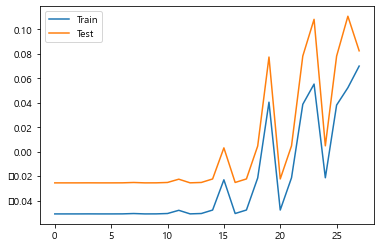

In [65]:
plt.plot(range(len(train_rate)),train_arr[:,2], label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2], label='Test')
plt.legend()
plt.show()

In [66]:
#실험을 통해 얻은 최적의 C,gamma 파라미터로 만든 모형
svr=SVR(C=1000,gamma=0.01)
svr.fit(X_train_scaled, y_train)
score_tr=svr.score(X_train_scaled, y_train)
score_te=svr.score(X_test_scaled, y_test)
result_tr.append(score_tr)
result_te.append(score_te)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)

학습용 정확도 : 0.05228532035799194
검증용 정확도 : 0.110755640261748


In [67]:
predictions = svr.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 18.808247997938135


In [68]:
################ Gradient boosting ################
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(X_train_scaled, y_train)
score_tr=GB.score(X_train_scaled, y_train)
score_te=GB.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.5333703718998837
검증용 정확도 : 0.09934402095469563


In [69]:
predictions = GB.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 18.92854584135422


In [70]:
print(result_tr)
print(result_te)
print(result_rm)

[0.0754073551432668, 0.16514475840891274, 0.8697104625137173, 0.24373912101656126, 0.08237880570814482, 0.05228532035799194, 0.5333703718998837]
[0.1002670618640199, 0.03406717801839598, 0.012425181529628682, -0.008309359318597442, 0.09778630151897594, 0.110755640261748, 0.09934402095469563]
[18.918843856698377, 19.602490167729044, 19.820873361672103, 20.027866237889004, 18.944907596800146, 18.808247997938135, 18.92854584135422]


최적의 알고리즘(학습용): RF
최고 정확도(학습용): 0.8697104625137173
최적의 알고리즘(검증용): SVR
최고 정확도(검증용): 0.110755640261748


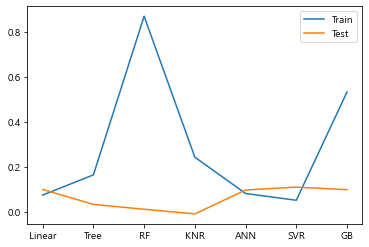

In [71]:
#분류 모형의 정확도 비교
methods=['Linear','Tree','RF','KNR','ANN','SVR', 'GB'] #분류 모형 이름
result_tr_arr=np.array(result_tr) #넘파이배열로 바꾸고
max_rate_tr=np.max(result_tr_arr)  #최대값을 구하고
idx_tr=np.argmax(result_tr_arr)  #최대값의 인덱스

result_te_arr=np.array(result_te)
max_rate_te=np.max(result_te_arr) 
idx_te=np.argmax(result_te_arr) 

print('최적의 알고리즘(학습용):',methods[idx_tr]) 
print('최고 정확도(학습용):', max_rate_tr)

print('최적의 알고리즘(검증용):',methods[idx_te]) 
print('최고 정확도(검증용):', max_rate_te)

plt.plot(methods, result_tr_arr, label='Train')
plt.plot(methods, result_te_arr, label='Test')
plt.legend()
plt.show() 

최적의 알고리즘(평균제곱오차))): SVR
최저 평균제곱오차: 18.808247997938135


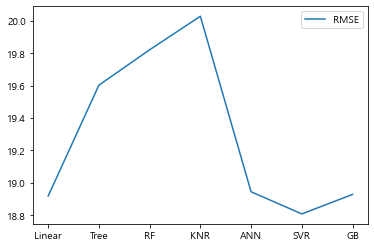

In [72]:
result_rm_arr=np.array(result_rm)
min_rate_rm=np.min(result_rm_arr) #최소값을 구하고
idx_rm=np.argmin(result_rm_arr)

print('최적의 알고리즘(평균제곱오차))):',methods[idx_rm]) 
print('최저 평균제곱오차:', min_rate_rm)

plt.plot(methods, result_rm_arr, label='RMSE')
plt.legend()
plt.show() 